In [40]:
# !pip install numpy pandas matplotlib sympy scipy

# problem 2

A servo motor can be described by the following state equation

$$
\begin{align*}
\begin{bmatrix}
\dot{x_1} \\
\dot{x_2}
\end{bmatrix}
&=
\begin{bmatrix}
0 & 1 \\
0 & -1
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
+
\begin{bmatrix}
0 \\
1
\end{bmatrix}
u(t)
\end{align*}
$$

Where x_1  is the angular position, x_2  is the angular velocity of the motor shaft and u(t) is the applied voltage. A control system is designed to drive the angular position to zero using the input u(t). Find an optimum input u(t) that derives the system from 30 degrees angular position of the shaft to zero in 25 seconds while minimizing the cost function given by


\begin{align*}
J&= 1/2  \begin{bmatrix}
x_1 (25) \\
x_2 (25)
\end{bmatrix}^T P \begin{bmatrix}
x_1 (25) \\
x_2 (25)
\end{bmatrix} + 1/2 \int_{0}^{25} \left( \begin{bmatrix}
x_1 (t) \\
x_2 (t)
\end{bmatrix}^T Q \begin{bmatrix}
x_1 (t) \\
x_2 (t)
\end{bmatrix} + ru^2 (t) \right) dt
\end{align*}



a.	Assuming fixed final state, solve for optimal feedback control for two different sets of P, Q, and r.

b.	How is the optimal cost inluenced by the selection of P, Q, and r?

c.	Rework parts (a) and (b) if the final state is free.



## imports 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import scipy as sc

from sympy import symbols, Eq, solve, simplify, MatrixSymbol
from pprint import pprint
from IPython.display import display, Math

## define the system and cost functions

In [64]:
n_states = 2
p_inputs = 1


x_k = sp.MatrixSymbol('x_k', n_states, 1)
x_kplus1 = sp.MatrixSymbol('x_{k+1}', n_states, 1)
x_0 = sp.MatrixSymbol('x_0', n_states, 1)
a = sp.MatrixSymbol('A', n_states, n_states)
b = sp.MatrixSymbol('B', n_states, p_inputs)
u_k = sp.MatrixSymbol('u_k', 1, p_inputs)
u_star = sp.MatrixSymbol('u^*', 1, p_inputs)
k = symbols('k')
N = symbols('N')
i_sympy = symbols('i')
cost_L = symbols('L^k')
lmda_k = sp.MatrixSymbol(f'lambda_{k}', n_states, 1)
lmda_kplus1 = sp.MatrixSymbol(f'lambda_{k+1}', n_states, 1)
lmda_N = sp.MatrixSymbol(f'lambda_{N}', n_states, 1)
R = sp.MatrixSymbol('R', p_inputs, p_inputs)
G_n = sp.MatrixSymbol('G_n', n_states, n_states)
r_N = sp.MatrixSymbol('r_N', n_states, 1)
S_k = sp.MatrixSymbol('S_k', n_states, n_states)
S_kplus1 = sp.MatrixSymbol('S_{k+1}', n_states, n_states)
S_N = sp.MatrixSymbol('S_N', n_states, n_states)
Q = sp.MatrixSymbol('Q', n_states, n_states)



## Define the system dynamics
N_val = 25
a_val = sp.Matrix([[0, 1], [0, -1]])
b_val = sp.Matrix([[0], [1]])
R_val = sp.Matrix([[1]]) * 10      # input cost
x0 = sp.Matrix([30, 10])         # initial state, x1=30, let x2=30
rN = sp.Matrix([0, 0])

cost_k = .5 * u_k.T * R * u_k + .5 * (x_k.T * Q * x_k)
Q_val = sp.Matrix([[1, 0], [0, 1]])  * 1 # state cost, Q term
Sn_val = sp.Matrix([[1, 0], [0, 1]]) * 1 # terminal state cost, P term


Jnot = sp.Sum(cost_k, (k, 0, N-1))


def f(x, u):
    val = a*x + b*u
    return val


display(Math(r'system\ dynamics: x_{k+1} = ' + sp.latex(f(x_k, u_k))))
display(Math(r'cost\ function: J_0 = ' + sp.latex(Jnot)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# zero input response

finding the homogeneous solution of the differential equation

Text(0.5, 1.0, 'Zero input response')

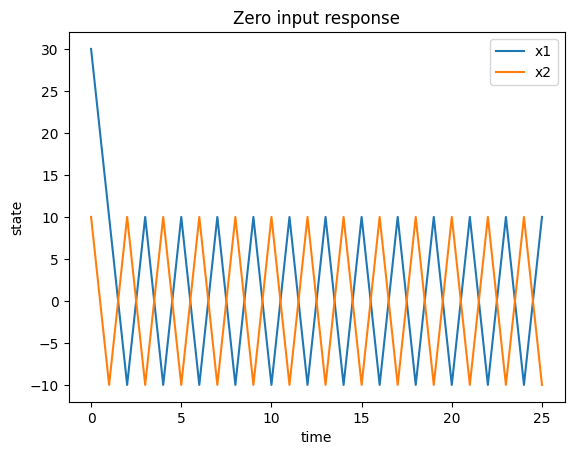

In [65]:


xk = x0
uk = 0
state_values0 = [xk]

for _ in range(N_val):
    xk1 = f(xk, uk)
    xk = xk1
    state_values0.append(xk)
    
state_values0 = [x.subs(a, a_val).subs(b, b_val) for x in state_values0]
state_values0 = np.array(state_values0).reshape(N_val+1, n_states)

plt.plot(state_values0[:, 0], label='x1')
plt.plot(state_values0[:, 1], label='x2')
plt.legend()
plt.xlabel('time')
plt.ylabel('state')
plt.title('Zero input response')

# fixed final state

In [68]:
print("path cost:")
display(Math(r'J_{0} = ' + sp.latex(Jnot)))

print("so, the hamioltonian is:")
H_k = cost_k + lmda_kplus1.T * (f(x_k, u_k))
display(Math(r'H^k = ' + sp.latex(H_k)))

print("the costate equation is:")
costate_eqn = sp.diff(H_k, x_k)
costate_eqn = Eq(costate_eqn, lmda_k)
display(Math(r'\frac{dH^k}{dx_k} = ' + sp.latex(costate_eqn)) )

print("the state equation is:")
state_eqn = sp.diff(H_k, lmda_kplus1)
display(Math(r'\frac{dH^k}{d\lambda_{k+1}} = x_{k+1} =' + sp.latex(state_eqn)) )

print("the stationarity equation is:")
stationarity_eqn = sp.diff(H_k, u_k)
display(Math(r'\frac{dH^k}{du_k} = 0 =' + sp.latex(stationarity_eqn)) )


## manual part: (for now)
lmda_k_with_lmdaN = a.T ** (N - k) * lmda_N
display(Math(r'\lambda_k = ' + sp.latex(lmda_k_with_lmdaN)))
u_k1 = -R ** -1 * b.T * lmda_kplus1
# u_k1 = u_k1.subs(R, R_val)
display(Math(r'u_k = ' + sp.latex(u_k1)))


u_k1 = u_k1.subs(lmda_kplus1, lmda_k_with_lmdaN).subs(k, k+1)
display(Math(r'u_k = ' + sp.latex(u_k1)))
x_k1 = f(x_k, u_k1)
display(Math(r'x_{k+1} = ' + sp.latex(x_k1)))

xk = x_0
for _ in range(N_val):
    xk1 = x_k1.subs(x_k, xk)
    xk = xk1 
print("we get:")
display(Math(r'x_N = ' + sp.latex(xk)))
print("which is the same as:")
Gk = sp.Sum(a**(k-i_sympy-1) * b * R**-1 * b.T * (a.T)**(N-i_sympy-1) , (i_sympy, 0, k-1))
Gn = Gk.subs(k, N)
display(Math(r'x_N = A^{N}x_0 ' + sp.latex(-Gn) + sp.latex(lmda_N)))
print("where")
display(Math(r'G_N = ' + sp.latex(Gn)))
print("we can precalculate the Gn term:")
gn_val = Gn.subs(a, a_val).subs(b, b_val).subs(R, R_val).subs(N, N_val).simplify().doit()
gn_val = np.array(gn_val).astype(np.float64)
print(gn_val)

print("we can also precalculate the costate values:")
val = rN - (a**N_val*x_0).subs(a, a_val).subs(N, N_val).subs(x_0, x0).simplify().doit()
lmda_n_val = -sc.linalg.inv(gn_val) @ val
display(Math(r'\lambda_N = ' + sp.latex(lmda_n_val)))
lmdak_val = lmda_n_val
lmda_n_values = [lmda_n_val]
for i in range(N_val, 0, -1):
    lmdak_val = a_val.T @ lmdak_val
    lmda_n_values.append(lmdak_val)
lmda_n_values = np.array(lmda_n_values).reshape(N_val+1, n_states)

uk_star = u_k1.subs(lmda_N, lmda_n_val).simplify()
display(Math(r'u^* = ' + sp.latex(uk_star)))



path cost:


<IPython.core.display.Math object>

so, the hamioltonian is:


<IPython.core.display.Math object>

the costate equation is:


<IPython.core.display.Math object>

the state equation is:


<IPython.core.display.Math object>

the stationarity equation is:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

we get:


<IPython.core.display.Math object>

which is the same as:


<IPython.core.display.Math object>

where


<IPython.core.display.Math object>

we can precalculate the Gn term:
[[ 2.4 -2.4]
 [-2.4  2.5]]
we can also precalculate the costate values:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Text(0.5, 1.0, 'Optimal input')

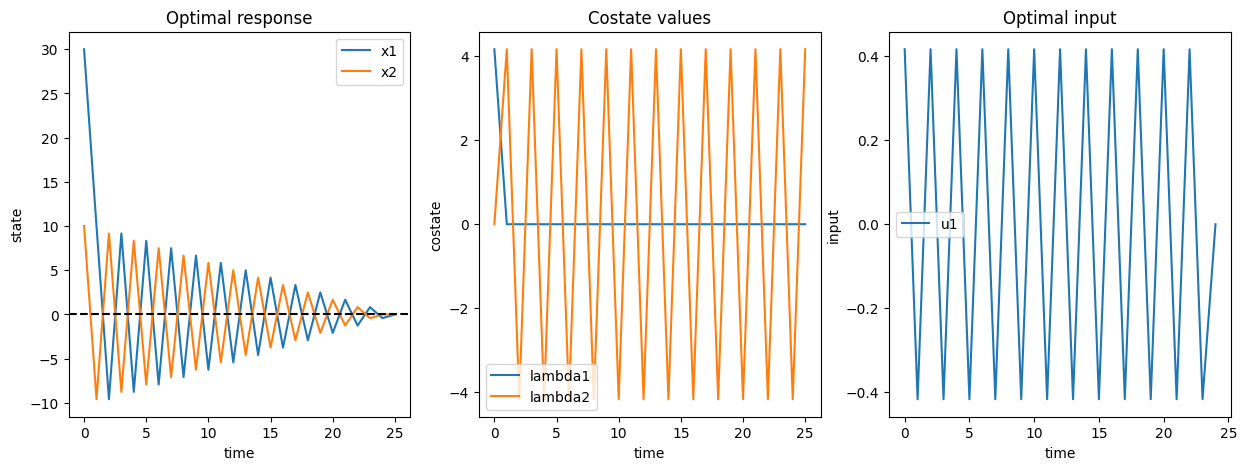

In [69]:
## simulate the system with the optimal input

xk = x0
state_values = [xk]
input_values = []   
for i in range(N_val):
    uk_val = uk_star.subs(k, i).subs(R, R_val).subs(a, a_val).subs(b, b_val).subs(N, N_val)
    uk_val = uk_val.simplify().doit()
    uk_val = np.array(uk_val).astype(np.float64)
    xk = a_val @ xk + b_val @ uk_val
    state_values.append(xk)
    input_values.append(uk_val)

state_values = np.array(state_values).reshape(N_val+1, n_states)
input_values = np.array(input_values).reshape(N_val, p_inputs)

figrow = 1
figcol = 3
fig, axes = plt.subplots(figrow, figcol, figsize=(figcol*5, figrow*5))
axes = axes.flatten()
axes = (ax for ax in axes)

ax = next(axes)
ax.plot(state_values[:, 0], label='x1')
ax.plot(state_values[:, 1], label='x2')
ax.axhline(0, color='black', linestyle='--')
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('state')
ax.set_title('Optimal response')

ax = next(axes)
ax.plot(lmda_n_values[:, 0], label='lambda1')
ax.plot(lmda_n_values[:, 1], label='lambda2')
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('costate')
ax.set_title('Costate values')

ax = next(axes)
ax.plot(input_values[:, 0], label='u1')
# ax.plot(input_values[:, 1], label='u2')
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('input')
ax.set_title('Optimal input')


# free final state

In [25]:
sk = a.T * (S_kplus1 - S_kplus1 * b *(b.T * S_kplus1 * b + R)**-1 * b.T * S_kplus1) * a + Q
display(Math(r'S_k = ' + sp.latex(sk)))

print("we can precalculate the Sk term:")

sk_val = Sn_val
sk_vals = [sk_val]
for i in range(N_val, 0, -1):
    sk_val = sk.subs(S_kplus1, sk_val).subs(a, a_val).subs(b, b_val).subs(R, R_val).subs(Q, Q_val).subs(N, N_val).simplify().doit()
    # sk_val = np.array(sk_val).astype(np.float64)
    sk_vals.append(sk_val)
sk_vals = np.array(sk_vals).reshape(N_val+1, n_states, n_states)
sk_vals = sk_vals[::-1, :, :]

kk = (b.T * S_kplus1 * b + R)**-1 * b.T * S_kplus1 * a
display(Math(r'K_k = ' + sp.latex(kk)))

k_vals = []
for i in range(N_val):
    sk_plus1 = sk_vals[i+1]
    val = kk.subs(a, a_val).subs(b, b_val).subs(R, R_val).subs(S_kplus1, sp.Matrix(sk_plus1)).simplify().doit()
    k_vals.append(np.array(val).astype(np.float64))
    
    
xk = x0
uk_vals3 = []
state_values3 = [xk]
for i in range(N_val):
    uk_val = -k_vals[i] @ xk
    xk = a_val @ xk + b_val @ uk_val
    uk_vals3.append(uk_val)
    state_values3.append(xk)

state_values3 = np.array(state_values3).reshape(N_val+1, n_states)
uk_vals3 = np.array(uk_vals3).reshape(N_val, p_inputs)

<IPython.core.display.Math object>

we can precalculate the Sk term:


<IPython.core.display.Math object>

Text(0.5, 1.0, 'Optimal input, closed loop')

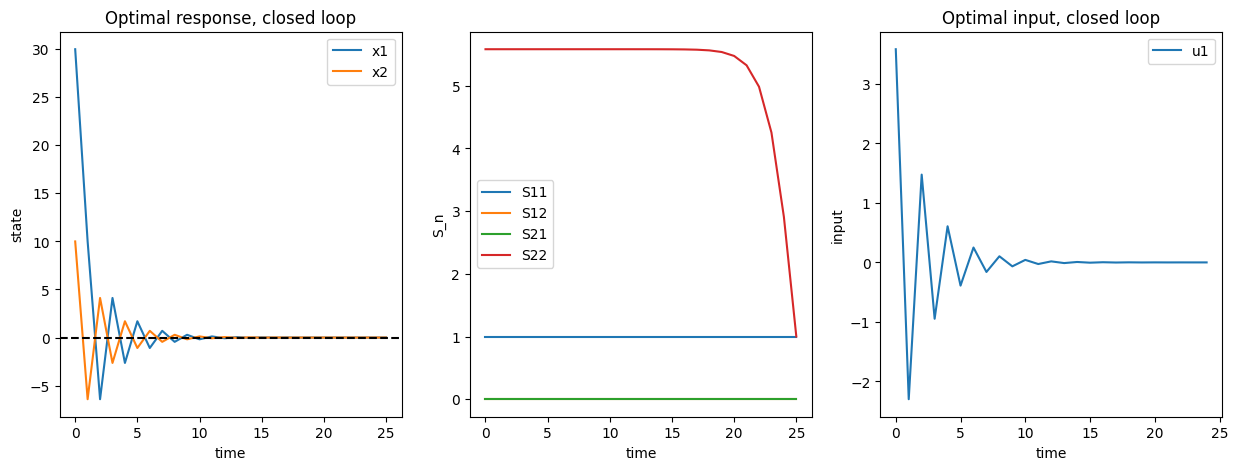

In [26]:
figrow = 1
figcol = 3
fig, axes = plt.subplots(figrow, figcol, figsize=(figcol*5, figrow*5))
axes = axes.flatten()
axes = (ax for ax in axes)

ax = next(axes)
ax.plot(state_values3[:, 0], label='x1')
ax.plot(state_values3[:, 1], label='x2')
ax.axhline(0, color='black', linestyle='--')
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('state')
ax.set_title('Optimal response, closed loop')

ax = next(axes)
ax.plot(sk_vals[:, 0, 0], label='S11')
ax.plot(sk_vals[:, 0, 1], label='S12')
ax.plot(sk_vals[:, 1, 0], label='S21')
ax.plot(sk_vals[:, 1, 1], label='S22')
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel(r'S_n')

ax = next(axes)
ax.plot(uk_vals3[:, 0], label='u1')
# ax.plot(uk_vals3[:, 1], label='u2')
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('input')
ax.set_title('Optimal input, closed loop')

# conversion of total calculation to a functional class

In [54]:

class system:
    def __init__(self, a, b, path_cost_k):
        self.a_val = a
        self.b_val = b
        self.path_cost_k = path_cost_k
        
        ### sympy symbols
        self.n_states = a.shape[0]
        self.p_inputs = b.shape[1]
        
        self.x_k = sp.MatrixSymbol('x_k', self.n_states, 1)
        self.x_kplus1 = sp.MatrixSymbol('x_{k+1}', self.n_states, 1)
        self.x_0 = sp.MatrixSymbol('x_0', self.n_states, 1)
        self.a = sp.MatrixSymbol('A', self.n_states, self.n_states)
        self.b = sp.MatrixSymbol('B', self.n_states, self.p_inputs)
        self.u_k = sp.MatrixSymbol('u_k', 1, self.p_inputs)
        self.u_star = sp.MatrixSymbol('u^*', 1, self.p_inputs)
        self.k = symbols('k')
        self.N = symbols('N')
        self.i_sympy = symbols('i')
        self.cost_L = symbols('L^k')
        self.lmda_k = sp.MatrixSymbol(f'lambda_{self.k}', self.n_states, 1)
        self.lmda_kplus1 = sp.MatrixSymbol(f'lambda_{self.k+1}', self.n_states, 1)
        self.lmda_N = sp.MatrixSymbol(f'lambda_{self.N}', self.n_states, 1)
        self.R = sp.MatrixSymbol('R', self.p_inputs, self.p_inputs)
        self.G_n = sp.MatrixSymbol('G_n', self.n_states, self.n_states)
        self.r_N = sp.MatrixSymbol('r_N', self.n_states, 1)
        self.S_k = sp.MatrixSymbol('S_k', self.n_states, self.n_states)
        self.S_kplus1 = sp.MatrixSymbol('S_{k+1}', self.n_states, self.n_states)
        self.S_N = sp.MatrixSymbol('S_N', self.n_states, self.n_states)
        self.Q = sp.MatrixSymbol('Q', self.n_states, self.n_states)
        
        self.Jnot = sp.Sum(self.path_cost_k, (self.k, 0, self.N-1))
        
        print("system dynamics:")
        display(Math(r'x_{k+1} = ' + sp.latex(f(self.x_k, self.u_k))))
        
        print("path cost:")
        display(Math(r'J_{0} = ' + sp.latex(self.Jnot)))
        
    def f(self, x, u):
        val = self.a*x + self.b*u
        return val
        
    def fixed_final_optimal_control(self, R, Q, Sn, x0, rN, N, plot=True):
        H_k = self.path_cost_k + self.lmda_kplus1.T * (self.f(self.x_k, self.u_k))
        costate_eqn = sp.diff(H_k, self.x_k)
        costate_eqn = Eq(costate_eqn, self.lmda_k)
        state_eqn = sp.diff(H_k, self.lmda_kplus1)
        stationarity_eqn = sp.diff(H_k, self.u_k)
        
        ## manual part: (for now)
        lmda_k_with_lmdaN = self.a.T ** (N - self.k) * self.lmda_N
        u_k1 = -self.R ** -1 * self.b.T * self.lmda_kplus1
        u_k1 = u_k1.subs(self.R, R)
        u_k1 = u_k1.subs(self.lmda_kplus1, lmda_k_with_lmdaN).subs(self.k, self.k+1)
        x_k1 = self.f(self.x_k, u_k1)
        
        Gk = sp.Sum(self.a**(self.k-self.i_sympy-1) * self.b * self.R**-1 * self.b.T * (self.a.T)**(self.N-self.i_sympy-1) , (self.i_sympy, 0, self.k-1))
        Gn = Gk.subs(self.k, N)
        gn_val = Gn.subs(self.a, self.a_val).subs(self.b, self.b_val).subs(self.R, R).subs(self.N, N).simplify().doit()
        gn_val = np.array(gn_val).astype(np.float64)
        val = rN - (self.a**N*x0).subs(self.a, self.a_val).subs(self.N, N).subs(self.x_0, x0).simplify().doit()
        lmda_n_val = -sc.linalg.inv(gn_val) @ val
        lmdak_val = lmda_n_val
        lmda_n_values = [lmda_n_val]
        for i in range(N_val, 0, -1):
            lmdak_val = self.a_val.T @ lmdak_val
            lmda_n_values.append(lmdak_val)
        lmda_n_values = np.array(lmda_n_values).reshape(N+1, self.n_states)
        uk_star = u_k1.subs(self.lmda_N, lmda_n_val)
        
        ## simulate the system with the optimal input
        xk = x0
        state_values = [xk]
        input_values = []
        for i in range(N_val):
            uk_val = uk_star.subs(self.k, i).subs(self.R, R).subs(self.a, self.a_val).subs(self.b, self.b_val).subs(self.N, N)
            uk_val = uk_val.simplify().doit()
            uk_val = np.array(uk_val).astype(np.float64)
            xk = self.a_val @ xk + self.b_val @ uk_val
            state_values.append(xk)
            input_values.append(uk_val)
        state_values = np.array(state_values).reshape(N+1, self.n_states).astype(np.float64)
        input_values = np.array(input_values).reshape(N, self.p_inputs).astype(np.float64)
                 
        total_cost = .5 * xk.T @ Sn @ xk
        # total_cost = sp.Matrix([0])
        for i in range(N_val):
            total_cost += self.path_cost_k.subs(self.x_k, sp.Matrix(state_values[i])).subs(self.u_k, sp.Matrix(input_values[i])).subs(self.R, R).subs(self.Q, Q).simplify().doit()
            
        total_cost = np.array(total_cost).astype(np.float64).reshape(-1)[0]
        
        if plot:
            self.plot(state_values, input_values, lmda_n_values, { 'cost': total_cost})
        return [state_values, input_values, lmda_n_values, total_cost]
    
    
    
    
    
    def free_final_optimal_control(self, R, Q, Sn, x0, rN, N, plot=True):
        sk = self.a.T * (self.S_kplus1 - self.S_kplus1 * self.b *(self.b.T * self.S_kplus1 * self.b + R)**-1 * self.b.T * self.S_kplus1) * self.a + self.Q
        sk_val = Sn
        sk_vals = [sk_val]
        for i in range(N_val, 0, -1):
            sk_val = sk.subs(self.S_kplus1, sk_val).subs(self.a, self.a_val).subs(self.b, self.b_val).subs(self.R, R).subs(self.Q, Q).subs(self.N, N).simplify().doit()
            sk_vals.append(sk_val)
        sk_vals = np.array(sk_vals).reshape(N_val+1, self.n_states, self.n_states)
        sk_vals = sk_vals[::-1, :, :]
        kk = (self.b.T * self.S_kplus1 * self.b + self.R)**-1 * self.b.T * self.S_kplus1 * self.a
        k_vals = []
        for i in range(N_val):
            sk_plus1 = sk_vals[i+1]
            val = kk.subs(self.a, self.a_val).subs(self.b, self.b_val).subs(self.R, R).subs(self.S_kplus1, sp.Matrix(sk_plus1)).simplify().doit()
            k_vals.append(np.array(val).astype(np.float64))
        xk = x0
        uk_vals = []
        state_values = [xk]
        for i in range(N_val):
            uk_val = -k_vals[i] @ xk
            xk = self.a_val @ xk + self.b_val @ uk_val
            uk_vals.append(uk_val)
            state_values.append(xk)
            
        state_values = np.array(state_values).reshape(N_val+1, self.n_states)
        uk_vals = np.array(uk_vals).reshape(N_val, self.p_inputs)
        
        total_cost = .5 * xk.T @ Sn @ xk
        for i in range(N_val):
            total_cost += self.path_cost_k.subs(self.x_k, sp.Matrix(state_values[i])).subs(self.u_k, sp.Matrix(uk_vals[i])).subs(self.R, R).subs(self.Q, Q).simplify().doit()
        total_cost = np.array(total_cost).astype(np.float64).reshape(-1)[0]
        
        if plot:
            self.plot(state_values, uk_vals, sk_vals, { 'cost': total_cost}, free_final=True)
        return [state_values, uk_vals, sk_vals, total_cost]
        
    
    def plot(self, state_values, input_values, lmda_n_values, others=None, free_final=False):
        figrow = 1
        figcol = 3
        fig, axes = plt.subplots(figrow, figcol, figsize=(figcol*5, figrow*5))
        axes = axes.flatten()
        axes = (ax for ax in axes)

        ax = next(axes)
        for i in range(self.n_states):
            ax.plot(state_values[:, i], label=f'x{i+1}')
        ax.axhline(0, color='black', linestyle='--')
        ax.legend()
        ax.set_xlabel('time')
        ax.set_ylabel('state')
        ax.set_title('Optimal response')
        
        ax = next(axes)
        for i in range(self.n_states):
            ax.plot(lmda_n_values[:, i], label=f'sn{i+1}' if free_final else f'lambda{i+1}')
        ax.legend()
        ax.set_xlabel('time')
        ax.set_ylabel('sn' if free_final else 'costate')
        ax.set_title('Sn values' if free_final else 'Costate values')
        
        ax = next(axes)
        for i in range(self.p_inputs):
            ax.plot(input_values[:, i], label=f'u{i+1}')
        ax.legend()
        ax.set_xlabel('time')
        ax.set_ylabel('input')
        ax.set_title('Optimal input')
        
        if others is not None:
            text = ''
            for i, val in others.items():
                text += f'{i}: {val.round(1)}'
            text = r'{}'.format(text)
            fig.suptitle(text)
        

# part a and c

we have considered R, Q and P are all identity matrices multiplied by some scalar values.

system dynamics:


<IPython.core.display.Math object>

path cost:


<IPython.core.display.Math object>

''

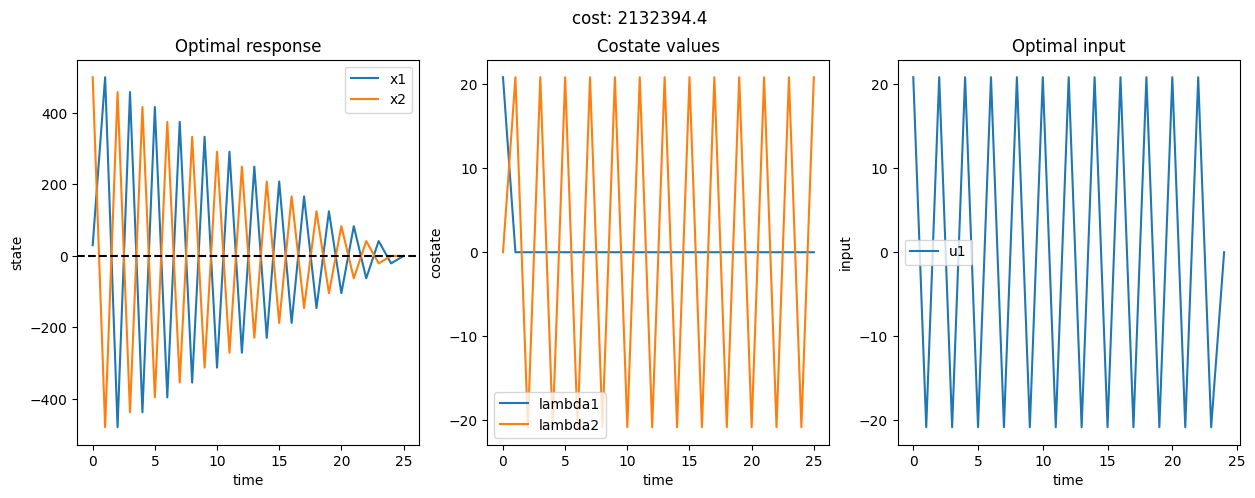

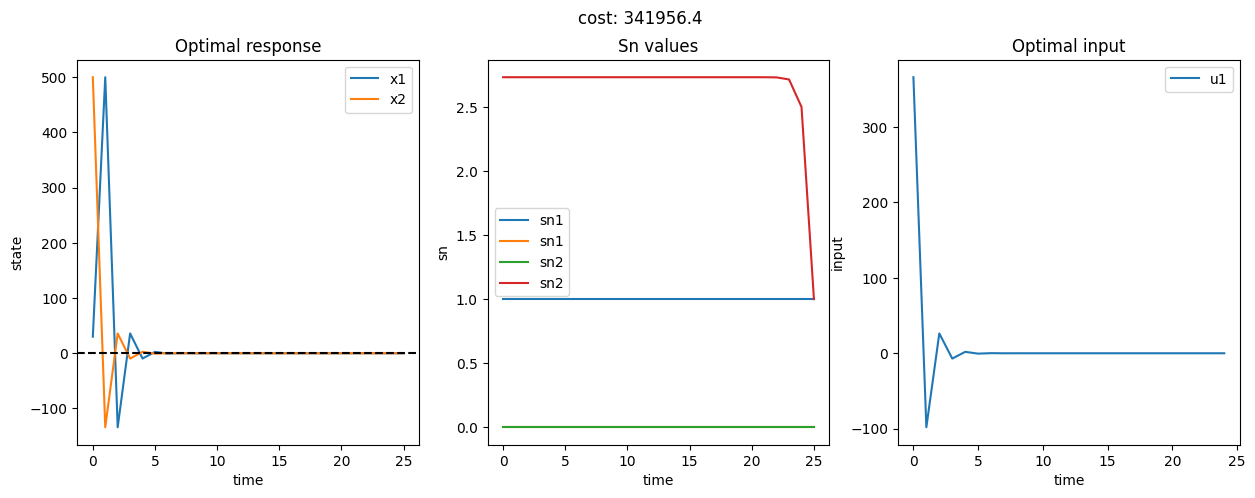

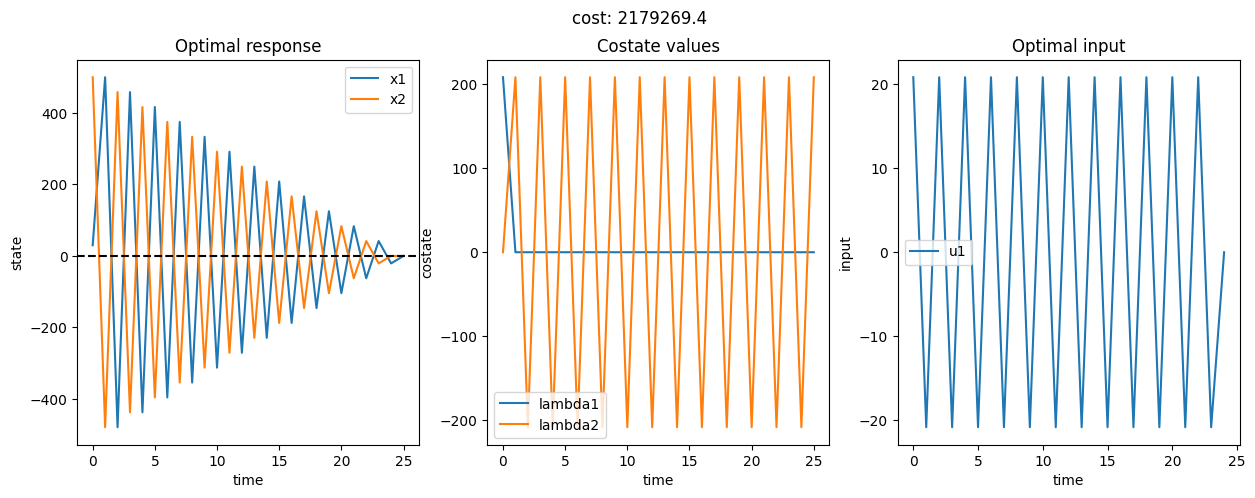

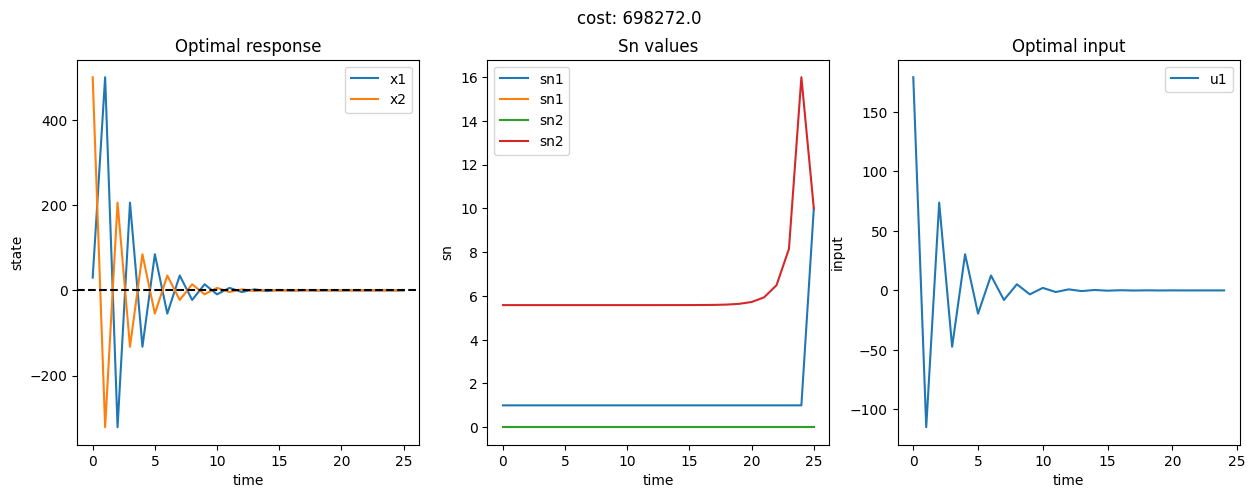

In [55]:
a_val = sp.Matrix([[0, 1], [0, -1]])
b_val = sp.Matrix([[0], [1]])

cost_k = .5 * u_k.T * R * u_k + .5 * (x_k.T * Q * x_k)

N_val = 25
x0 = sp.Matrix([30, 500])                # initial state, x1=30, let x2=30
rN = sp.Matrix([0, 0])

R_val = sp.Matrix([[1]])                # input cost
Q_val = sp.Matrix([[1, 0], [0, 1]])     # state cost, Q term
Sn_val = sp.Matrix([[1, 0], [0, 1]])    # terminal state cost, P term

sys_instance = system(a_val, b_val, cost_k)

# with one set of R, Q, Sn values
sys_instance.fixed_final_optimal_control(R_val, Q_val, Sn_val, x0, rN, N_val)
sys_instance.free_final_optimal_control(R_val, Q_val, Sn_val, x0, rN, N_val)

# with another set of R, Q, Sn values
sys_instance.fixed_final_optimal_control(R_val*10, Q_val, Sn_val, x0, rN, N_val)
sys_instance.free_final_optimal_control(R_val*10, Q_val, Sn_val*10, x0, rN, N_val)
""

# part b

we now estimate how the choice of P, Q, and r affects the total optimal cost in free final state case

In [49]:
r_range = np.linspace(1, 100, 10)
q_range = np.linspace(1, 100, 10)
sn_range = np.linspace(1, 100, 3)

R_val = sp.Matrix([[1]])                # input cost
Q_val = sp.Matrix([[1, 0], [0, 1]])     # state cost, Q term
Sn_val = sp.Matrix([[1, 0], [0, 1]])    # terminal state cost, P term

results = []
for o,snval in enumerate(sn_range):
    print(f"working on {o+1}/{len(sn_range)}")
    snval = Sn_val * snval
    result = np.zeros((len(r_range), len(q_range)))
    for i, rval in enumerate(r_range):
        print("1", end='')
        rval = R_val * rval
        for j, qval in enumerate(q_range):
            print("0", end='')
            qval = Q_val * qval
            res = sys_instance.fixed_final_optimal_control(rval, qval, snval, x0, rN, N_val, plot=False)
            result[i, j] = res[-1]
    results.append(result)
    print("done")
results = np.array(results)

working on 1/3
10000000000100000000001000000000010000000000100000000001000000000010000000000100000000001000000000010000000000done
working on 2/3
10000000000100000000001000000000010000000000100000000001000000000010000000000100000000001000000000010000000000done
working on 3/3
10000000000100000000001000000000010000000000100000000001000000000010000000000100000000001000000000010000000000done


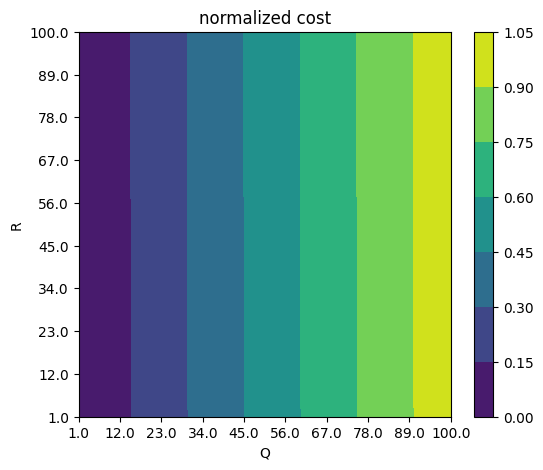

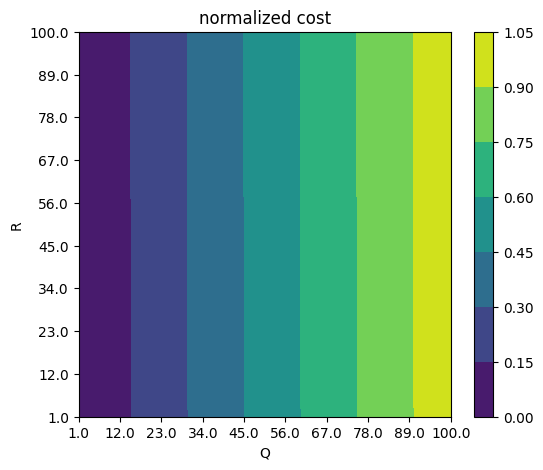

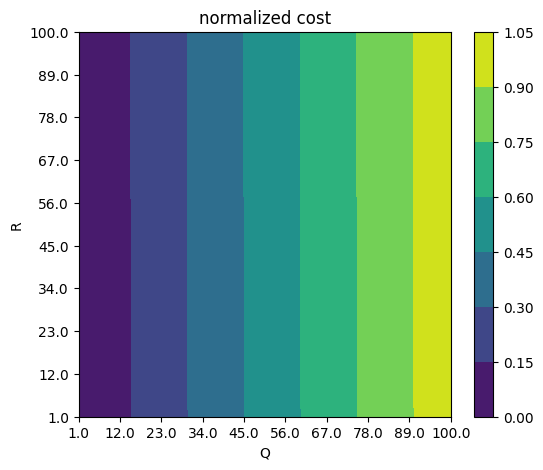

In [51]:
results = results / results.max()

for result in results:
    fig, axes = plt.subplots(1, 1, figsize=(6, 5))
    c = axes.contourf(result)
    fig.colorbar(c)
    axes.set_xlabel('Q')
    axes.set_ylabel('R')
    axes.set_xticks(np.arange(len(q_range)), q_range)
    axes.set_yticks(np.arange(len(r_range)), r_range)
    axes.set_title('normalized cost')
    plt.show()

The conclusion is that 